In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

pd.set_option('display.max_columns', None)

In [2]:
df_1 = pd.read_csv("/kaggle/input/hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv", sep=';', encoding="cp1251")

/tmp/ipykernel_30/1756704826.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("/kaggle/input/hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv", sep=';', encoding="cp1251")


In [3]:
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,prvs_npf,brth_plc,addrss_type,rgn,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,55,СФР,"1,ГОР. НОВОСИБИРСК",Адрес места жительства,ОМСКАЯ ОБЛ,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,60,СФР,"1,Г.БЕЛОГОРСК АМУРСКОЙ ОБЛ",Адрес места жительства,АМУРСКАЯ ОБЛ,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,60,СФР,"1,,,МОСКВА,",Адрес места жительства,МОСКВА Г,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,55,NaN,"1,Д. ДОБРОМЫШ АЛЬМЕТЬЕВСКОГО Р-НА ТАТАРСКОЙ АССР",Адрес места жительства,ТАТАРСТАН РЕСП,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,60,СФР,УДМУРТСКАЯ АССР ИГРИНСКИЙ СВЕТЛЯНА,Адрес по прописке,УДМУРТСКАЯ РЕСП,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   slctn_nmbr      532825 non-null  int64  
 1   clnt_id         532825 non-null  object 
 2   accnt_id        532825 non-null  object 
 3   gndr            532825 non-null  object 
 4   brth_yr         532825 non-null  int64  
 5   prsnt_age       532825 non-null  int64  
 6   accnt_bgn_date  532825 non-null  object 
 7   cprtn_prd_d     532825 non-null  int64  
 8   erly_pnsn_flg   532825 non-null  int64  
 9   accnt_status    532825 non-null  object 
 10  pnsn_age        532825 non-null  int64  
 11  prvs_npf        469411 non-null  object 
 12  brth_plc        532825 non-null  object 
 13  addrss_type     532825 non-null  object 
 14  rgn             532133 non-null  object 
 15  dstrct          200421 non-null  object 
 16  city            378555 non-null  object 
 17  sttlmnt   

In [5]:
df_1.isna().sum(), df_1.isnull().sum(), df_1.duplicated().sum()

(slctn_nmbr             0
 clnt_id                0
 accnt_id               0
 gndr                   0
 brth_yr                0
 prsnt_age              0
 accnt_bgn_date         0
 cprtn_prd_d            0
 erly_pnsn_flg          0
 accnt_status           0
 pnsn_age               0
 prvs_npf           63414
 brth_plc               0
 addrss_type            0
 rgn                  692
 dstrct            332404
 city              154270
 sttlmnt           373226
 pstl_code              0
 okato                692
 phn                    0
 email                  0
 lk                     0
 assgn_npo              0
 assgn_ops              0
 dtype: int64,
 slctn_nmbr             0
 clnt_id                0
 accnt_id               0
 gndr                   0
 brth_yr                0
 prsnt_age              0
 accnt_bgn_date         0
 cprtn_prd_d            0
 erly_pnsn_flg          0
 accnt_status           0
 pnsn_age               0
 prvs_npf           63414
 brth_plc              

In [6]:
df_1["okato"].nsmallest(38)

141653      112.0
191792      112.0
470388      112.0
465         398.0
26313       398.0
26918       398.0
31407       398.0
33905       398.0
68210       398.0
72233       398.0
75191       398.0
86349       398.0
96651       398.0
99046       398.0
129399      398.0
148346      398.0
200050      398.0
200153      398.0
207897      398.0
223873      398.0
267130      398.0
295666      398.0
307725      398.0
312643      398.0
313051      398.0
336217      398.0
376101      398.0
385738      398.0
391112      398.0
431310      398.0
466278      398.0
473582      398.0
479040      398.0
513305      398.0
158098      804.0
198597      804.0
498209    55000.0
514987    55000.0
Name: okato, dtype: float64

In [7]:
df_1["rgn"].unique()

array(['ОМСКАЯ ОБЛ', 'АМУРСКАЯ ОБЛ', 'МОСКВА Г', 'ТАТАРСТАН РЕСП',
       'УДМУРТСКАЯ РЕСП', 'СВЕРДЛОВСКАЯ ОБЛ', 'ТОМСКАЯ ОБЛ',
       'НОВОСИБИРСКАЯ ОБЛ', 'БАШКОРТОСТАН РЕСП', 'БУРЯТИЯ РЕСП',
       'САМАРСКАЯ ОБЛ', 'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ',
       'ВОЛОГОДСКАЯ ОБЛ', 'ВОЛГОГРАДСКАЯ ОБЛ', 'КРАСНОЯРСКИЙ КРАЙ',
       'ЗАБАЙКАЛЬСКИЙ КРАЙ', 'ЧЕЛЯБИНСКАЯ ОБЛ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ДАГЕСТАН РЕСП', 'ЛИПЕЦКАЯ ОБЛ', 'ЯРОСЛАВСКАЯ ОБЛ',
       'САНКТ-ПЕТЕРБУРГ Г', 'КУРГАНСКАЯ ОБЛ', 'МУРМАНСКАЯ ОБЛ',
       'ПРИМОРСКИЙ КРАЙ', 'САХА /ЯКУТИЯ/ РЕСП', 'ИРКУТСКАЯ ОБЛ',
       'САРАТОВСКАЯ ОБЛ', 'КОСТРОМСКАЯ ОБЛ', 'ЯМАЛО-НЕНЕЦКИЙ АО',
       'РОСТОВСКАЯ ОБЛ', 'ОРЕНБУРГСКАЯ ОБЛ', 'ПСКОВСКАЯ ОБЛ',
       'УЛЬЯНОВСКАЯ ОБЛ', 'МАРИЙ ЭЛ РЕСП',
       'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ', 'ОРЛОВСКАЯ ОБЛ', 'КАРЕЛИЯ РЕСП',
       'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС', 'КОМИ РЕСП', 'НИЖЕГОРОДСКАЯ ОБЛ',
       'ХАКАСИЯ РЕСП', 'ПЕРМСКИЙ КРАЙ', 'ВЛАДИМИРСКАЯ ОБЛ',
       'НОВГОРОДСКАЯ ОБЛ', 'МОСКОВСКАЯ О

In [8]:
#df_1["gndr"] = df_1["gndr"].replace({"ж":1, "м": 0})
#df_1= df_1.replace({"да":1,"нет":0})

In [9]:
df_1['age_group'] = (df_1['prsnt_age'] // 5) * 5
df_1['age_group'].value_counts()

age_group
60    224953
65    216062
55     48786
70     35629
50      4733
75      1751
45       387
80       314
85       162
90        21
40        18
95         7
35         2
Name: count, dtype: int64

In [10]:
df_1.drop(columns=["sttlmnt", "city", "dstrct", "prvs_npf", "brth_plc", "pstl_code", "okato", "prsnt_age"], inplace=True)
df_1.dropna(inplace=True)

In [11]:
df_1['accnt_bgn_date'] = pd.to_datetime(df_1['accnt_bgn_date'])
current_date = pd.to_datetime("today")

df_1['accnt_bgn_year'] = df_1['accnt_bgn_date'].dt.year
df_1['accnt_bgn_month'] = df_1['accnt_bgn_date'].dt.month
df_1['accnt_bgn_day'] = df_1['accnt_bgn_date'].dt.day
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,pnsn_age,addrss_type,rgn,phn,email,lk,assgn_npo,assgn_ops,age_group,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,2005-12-21,96,0,Накопительный период,55,Адрес места жительства,ОМСКАЯ ОБЛ,нет,нет,нет,нет,нет,60,2005,12,21
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,2009-06-29,283,0,Накопительный период,60,Адрес места жительства,АМУРСКАЯ ОБЛ,нет,нет,нет,нет,нет,70,2009,6,29
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,2006-12-25,88,0,Накопительный период,60,Адрес места жительства,МОСКВА Г,нет,нет,нет,нет,нет,65,2006,12,25
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,2013-09-03,1301,0,Накопительный период,55,Адрес места жительства,ТАТАРСТАН РЕСП,нет,нет,нет,нет,нет,60,2013,9,3
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,2010-12-06,106,0,Накопительный период,60,Адрес по прописке,УДМУРТСКАЯ РЕСП,нет,нет,нет,нет,нет,65,2010,12,6


In [12]:
df_1.drop(columns=['accnt_bgn_date'], inplace=True)

In [13]:
#region_code={
#    "ОМСКАЯ ОБЛ": 1,
#    "АМУРСКАЯ ОБЛ": 1,
#    "МОСКВА Г": 1,
#    "ТАТАРСТАН РЕСП": 1,
#    "УДМУРТСКАЯ РЕСП": 1,
#    "СВЕРДЛОВСКАЯ ОБЛ": 1,
#    "ТОМСКАЯ ОБЛ": 1,
#    "НОВОСИБИРСКАЯ ОБЛ": 1,
#    "БАШКОРТОСТАН РЕСП": 1,
#    "БУРЯТИЯ РЕСП": 1,
#    "САМАРСКАЯ ОБЛ": 1,
#    "КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ": 42,
#    "ВОЛОГОДСКАЯ ОБЛ": 1,
#    "ВОЛГОГРАДСКАЯ ОБЛ": 1,
#    "КРАСНОЯРСКИЙ КРАЙ": 1,
#    "ЗАБАЙКАЛЬСКИЙ КРАЙ": 1,
#    "ЧЕЛЯБИНСКАЯ ОБЛ": 1,
#    "СТАВРОПОЛЬСКИЙ КРАЙ": 1,
#    "ДАГЕСТАН РЕСП": 1,
#    "ЛИПЕЦКАЯ ОБЛ": 1,
#    "ЯРОСЛАВСКАЯ ОБЛ": 1,
#    "САНКТ-ПЕТЕРБУРГ Г": 1,
#    "КУРГАНСКАЯ ОБЛ": 1,
#    "МУРМАНСКАЯ ОБЛ": 1,
#    "ПРИМОРСКИЙ КРАЙ": 1,
#    "САХА /ЯКУТИЯ/ РЕСП": 1,
#    "ИРКУТСКАЯ ОБЛ": 1,
#    "САРАТОВСКАЯ ОБЛ": 1,
#    "КОСТРОМСКАЯ ОБЛ": 1,
#    "ЯМАЛО-НЕНЕЦКИЙ АО": 1,
#    "РОСТОВСКАЯ ОБЛ": 1,
#    "ОРЕНБУРГСКАЯ ОБЛ": 1,
#    "ПСКОВСКАЯ ОБЛ": 1,
#    "УЛЬЯНОВСКАЯ ОБЛ": 1,
#    "МАРИЙ ЭЛ РЕСП": 1,
#    "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ": 1,
#    "ОРЛОВСКАЯ ОБЛ": 1,
#    "КАРЕЛИЯ РЕСП": 1,
#    "КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС": 42,
#    "КОМИ РЕСП": 1,
#    "НИЖЕГОРОДСКАЯ ОБЛ": 1,
#    "ХАКАСИЯ РЕСП": 1,
#    "ПЕРМСКИЙ КРАЙ": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#    "": 1,
#}

In [14]:
#df_1['rgn'] = df_1['rgn'].replace(region_code)

In [15]:
df_1 = pd.get_dummies(df_1, columns=['gndr', 'accnt_status', 'addrss_type', 'phn', 'email', 'lk', 'assgn_npo', 'assgn_ops', 'age_group'])

label_encoder = LabelEncoder()
df_1['rgn'] = label_encoder.fit_transform(df_1['rgn'])

df_1.replace({True: 1, False: 0}, inplace=True)

In [16]:
df_1.head()

,slctn_nmbr,clnt_id,accnt_id,brth_yr,cprtn_prd_d,erly_pnsn_flg,pnsn_age,rgn,accnt_bgn_year,accnt_bgn_month,accnt_bgn_day,gndr_ж,gndr_м,accnt_status_Выплатной период,accnt_status_Накопительный период,addrss_type_Адрес для информирования,addrss_type_Адрес за пределами РФ,addrss_type_Адрес места жительства,addrss_type_Адрес по прописке,phn_да,phn_нет,email_да,email_нет,lk_да,lk_нет,assgn_npo_да,assgn_npo_нет,assgn_ops_да,assgn_ops_нет,age_group_35,age_group_40,age_group_45,age_group_50,age_group_55,age_group_60,age_group_65,age_group_70,age_group_75,age_group_80,age_group_85,age_group_90,age_group_95
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,1960,96,0,55,57,2005,12,21,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,1954,283,0,60,3,2009,6,29,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,1955,88,0,60,49,2006,12,25,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,1962,1301,0,55,80,2013,9,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,1955,106,0,60,86,2010,12,6,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
#plt.figure(dpi=128)
#sns.pairplot(client_dummies, hue='erly_pnsn_flg')
#plt.title("графичек")
#plt.show()

In [18]:
#numeric_columns = list(client_dummies.describe().columns)

In [19]:
#fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 4 * len(numeric_columns)), dpi=300)

#for ind, col in enumerate(numeric_columns):
    
#    plt.subplot(len(numeric_columns), 2, 2 * ind + 1)
#    sns.histplot(client_dummies, x = col, bins = 40, kde = True);
#    plt.gca().set_title(col)
        
#    plt.subplot(len(numeric_columns), 2, 2 * ind + 2)
#    sns.boxplot(client_dummies, x = col, orient="h", palette="flare")
#    plt.gca().set_title(col)
    
#fig.tight_layout()
#plt.show()

In [20]:
df_2 = pd.read_csv("/kaggle/input/hack-pfo/train_data/trnsctns_ops_trn.csv", sep=';', encoding="cp1251")

In [21]:
df_2.head()

,accnt_id,mvmnt_type,sum_type,cmmnt,sum,oprtn_date
0,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,2096.31,2012-02-12
1,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-02-13
2,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-05-15
3,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-08-14
4,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-11-13


In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27225905 entries, 0 to 27225904
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   accnt_id    object 
 1   mvmnt_type  float64
 2   sum_type    object 
 3   cmmnt       object 
 4   sum         float64
 5   oprtn_date  object 
dtypes: float64(2), object(4)
memory usage: 1.2+ GB


In [23]:
df_2.describe()

,mvmnt_type,sum
count,2.722590e+07,2.722590e+07
mean,1.067317e-01,8.785550e+02
std,3.087718e-01,5.302398e+03
min,0.000000e+00,-2.906185e+05
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,3.000000e-01
75%,0.000000e+00,3.166800e+02
max,1.000000e+00,8.493445e+05


In [24]:
df_2.isna().sum(), df_2.isnull().sum(), df_2.duplicated().sum()

(accnt_id      0
 mvmnt_type    0
 sum_type      0
 cmmnt         0
 sum           0
 oprtn_date    0
 dtype: int64,
 accnt_id      0
 mvmnt_type    0
 sum_type      0
 cmmnt         0
 sum           0
 oprtn_date    0
 dtype: int64,
 2466762)

In [25]:
df_2["mvmnt_type"].value_counts()

mvmnt_type
0.0    24320039
1.0     2905866
Name: count, dtype: int64

In [26]:
df_2['oprtn_date'] = pd.to_datetime(df_2['oprtn_date'])
df_2['oprtn_year'] = df_2['oprtn_date'].dt.year
df_2['oprtn_month'] = df_2['oprtn_date'].dt.month
df_2['oprtn_day'] = df_2['oprtn_date'].dt.day

,accnt_id,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,oprtn_year,oprtn_month,oprtn_day
0,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,2096.31,2012-02-12,2012,2,12
1,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-02-13,2012,2,13
2,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-05-15,2012,5,15
3,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-08-14,2012,8,14
4,0x00003A37F46E104EB1AB513510DC1C79,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.00,2012-11-13,2012,11,13


In [27]:
df_2.drop(columns=["oprtn_date"], inplace=True)

In [28]:
df_2 = pd.get_dummies(df_2, columns=['mvmnt_type', 'sum_type', 'cmmnt'])
df_2 = df_2.replace({True: 1, False: 0})

In [29]:
df_2.head()

,accnt_id,sum,oprtn_year,oprtn_month,oprtn_day,mvmnt_type_0.0,mvmnt_type_1.0,sum_type_Взносы работодателя (ДСВ2),sum_type_Взносы софинансирование,sum_type_Выплатной резерв НЧ,sum_type_Выплатной резерв СВ,sum_type_Доп. страховые взносы (ДСВ1),sum_type_ИД Выплатной резерв НЧ,sum_type_ИД Выплатной резерв СВ,sum_type_ИД на взносы работодателя (ИД ДСВ2),sum_type_ИД на доп. взносы (ИД ДСВ1),sum_type_ИД на материнский капитал,sum_type_ИД на софинансирование,sum_type_ИД на страховые взносы на НЧ,sum_type_Материнский капитал,sum_type_РФОПС,sum_type_Страховые взносы на НЧ,cmmnt_Возврат выплаченных сумм (ОПС),cmmnt_Восполнение (ОПС),cmmnt_Закрытие договора ОПС,cmmnt_Компенсация(ОПС),cmmnt_Корректировка записей регистров (ОПС),cmmnt_Назначение пенсии (ОПС),cmmnt_Начисление (ОПС),cmmnt_Начисление пенсии (ОПС),cmmnt_Перевод в резерв Фонда (ОПС),cmmnt_Перевод между счетами ОПС,cmmnt_Передача СПН в другой фонд по Уведомлениям ПФР о разделении ИЛС (ОПС),cmmnt_Поступление взносов ОПС,cmmnt_Приостановление/возобновление/прекращение выплат пенсии (ОПС),cmmnt_Распределение ИД ОПС,cmmnt_Решение о единовременной выплате (ОПС)
0,0x00003A37F46E104EB1AB513510DC1C79,2096.31,2012,2,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,2,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,5,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,8,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,11,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
#for col in transactions_dummies.columns:
#   if col not in ['accnt_id', 'sum']:
#        first_values = transactions_dummies.groupby('accnt_id')[col].first().reset_index()
#        profile_by_account = profile_by_account.merge(first_values, on='accnt_id', how='left')

#profile_by_account

total_sum_by_account = df_2.groupby('accnt_id', as_index=False)['sum'].sum()
total_sum_by_account.rename(columns={'sum': 'total_transaction_sum'}, inplace=True)

df_2 = df_2.merge(total_sum_by_account, on='accnt_id', how='left')

df_2.head()

,accnt_id,sum,oprtn_year,oprtn_month,oprtn_day,mvmnt_type_0.0,mvmnt_type_1.0,sum_type_Взносы работодателя (ДСВ2),sum_type_Взносы софинансирование,sum_type_Выплатной резерв НЧ,sum_type_Выплатной резерв СВ,sum_type_Доп. страховые взносы (ДСВ1),sum_type_ИД Выплатной резерв НЧ,sum_type_ИД Выплатной резерв СВ,sum_type_ИД на взносы работодателя (ИД ДСВ2),sum_type_ИД на доп. взносы (ИД ДСВ1),sum_type_ИД на материнский капитал,sum_type_ИД на софинансирование,sum_type_ИД на страховые взносы на НЧ,sum_type_Материнский капитал,sum_type_РФОПС,sum_type_Страховые взносы на НЧ,cmmnt_Возврат выплаченных сумм (ОПС),cmmnt_Восполнение (ОПС),cmmnt_Закрытие договора ОПС,cmmnt_Компенсация(ОПС),cmmnt_Корректировка записей регистров (ОПС),cmmnt_Назначение пенсии (ОПС),cmmnt_Начисление (ОПС),cmmnt_Начисление пенсии (ОПС),cmmnt_Перевод в резерв Фонда (ОПС),cmmnt_Перевод между счетами ОПС,cmmnt_Передача СПН в другой фонд по Уведомлениям ПФР о разделении ИЛС (ОПС),cmmnt_Поступление взносов ОПС,cmmnt_Приостановление/возобновление/прекращение выплат пенсии (ОПС),cmmnt_Распределение ИД ОПС,cmmnt_Решение о единовременной выплате (ОПС),total_transaction_sum
0,0x00003A37F46E104EB1AB513510DC1C79,2096.31,2012,2,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
1,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,2,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
2,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,5,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
3,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,8,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
4,0x00003A37F46E104EB1AB513510DC1C79,0.00,2012,11,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96


In [31]:
df_2 = df_2[df_2['sum'] != 0]

In [32]:
df_2.head()

,accnt_id,sum,oprtn_year,oprtn_month,oprtn_day,mvmnt_type_0.0,mvmnt_type_1.0,sum_type_Взносы работодателя (ДСВ2),sum_type_Взносы софинансирование,sum_type_Выплатной резерв НЧ,sum_type_Выплатной резерв СВ,sum_type_Доп. страховые взносы (ДСВ1),sum_type_ИД Выплатной резерв НЧ,sum_type_ИД Выплатной резерв СВ,sum_type_ИД на взносы работодателя (ИД ДСВ2),sum_type_ИД на доп. взносы (ИД ДСВ1),sum_type_ИД на материнский капитал,sum_type_ИД на софинансирование,sum_type_ИД на страховые взносы на НЧ,sum_type_Материнский капитал,sum_type_РФОПС,sum_type_Страховые взносы на НЧ,cmmnt_Возврат выплаченных сумм (ОПС),cmmnt_Восполнение (ОПС),cmmnt_Закрытие договора ОПС,cmmnt_Компенсация(ОПС),cmmnt_Корректировка записей регистров (ОПС),cmmnt_Назначение пенсии (ОПС),cmmnt_Начисление (ОПС),cmmnt_Начисление пенсии (ОПС),cmmnt_Перевод в резерв Фонда (ОПС),cmmnt_Перевод между счетами ОПС,cmmnt_Передача СПН в другой фонд по Уведомлениям ПФР о разделении ИЛС (ОПС),cmmnt_Поступление взносов ОПС,cmmnt_Приостановление/возобновление/прекращение выплат пенсии (ОПС),cmmnt_Распределение ИД ОПС,cmmnt_Решение о единовременной выплате (ОПС),total_transaction_sum
0,0x00003A37F46E104EB1AB513510DC1C79,2096.31,2012,2,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
5,0x00003A37F46E104EB1AB513510DC1C79,112.51,2012,11,16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3352.96
8,0x00003A37F46E104EB1AB513510DC1C79,-868.37,2013,5,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
9,0x00003A37F46E104EB1AB513510DC1C79,868.36,2013,5,16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3352.96
12,0x00003A37F46E104EB1AB513510DC1C79,164.03,2013,11,16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3352.96


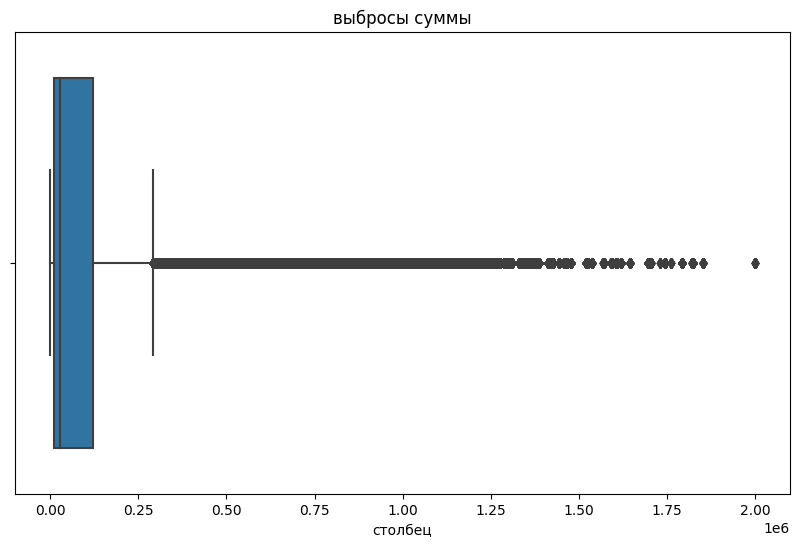

In [33]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df_2['total_transaction_sum'])

plt.title('выбросы суммы')
plt.xlabel('столбец')

plt.show()

In [34]:
#numeric_columns = list(df_2.describe().columns)

#fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 4 * len(numeric_columns)), dpi=300)

#for ind, col in enumerate(numeric_columns):
    
#    plt.subplot(len(numeric_columns), 2, 2 * ind + 1)
#    sns.histplot(df_2, x = col, bins = 40, kde = True);
#    plt.gca().set_title(col)
        
#    plt.subplot(len(numeric_columns), 2, 2 * ind + 2)
#    sns.boxplot(df_2, x = col, orient="h", palette="flare")
#    plt.gca().set_title(col)
    
#fig.tight_layout()
#plt.show()

In [35]:
#max(transactions_with_total[transactions_with_total["sum_type_Страховые взносы на НЧ"]==1]["sum"]) 849344.48

In [ ]:
df_merged = df_1.merge(df_2, on='accnt_id', how='left')
df_merged.head()

In [ ]:
#идеи для новых признаков

#Разница между возрастом клиента и возрастом выхода на пенсию
#df['age_diff_law_retirement'] = df['prsnt_age'] - df['pnsn_age']

#Среднее количество операций в месяц по счету клиента
#df['oprtn_month'] = df['oprtn_date'].dt.to_period('M')
#monthly_oprtn_counts = df.groupby(['accnt_id', 'oprtn_month']).size().reset_index(name='oprtn_count')
#freq_monthly_oprtns = monthly_oprtn_counts.groupby('accnt_id')['oprtn_count'].mean()
#df = df.merge(freq_monthly_oprtns.rename('freq_monthly_oprtns'), on='accnt_id', how='left')

#Процентное изменение суммы операций за последний год
#one_year_ago = current_date - pd.DateOffset(years=1)
#recent_sum = df[df['oprtn_date'] >= one_year_ago].groupby('accnt_id')['sum'].transform('sum')
#total_sum = df.groupby('accnt_id')['sum'].transform('sum')
#df['balance_change_rate'] = (recent_sum / total_sum) * 100